In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2024-03-23'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3070,2024-03-18,149.369995,152.929993,148.139999,148.479996,148.479996,47676700
3071,2024-03-19,148.979996,149.619995,147.009995,147.919998,147.919998,17748400
3072,2024-03-20,148.789993,149.759995,147.664993,149.679993,149.679993,17730000
3073,2024-03-21,150.320007,151.304993,148.009995,148.740005,148.740005,19843900


In [5]:
ma_100_days = data.Close.rolling(100).mean()

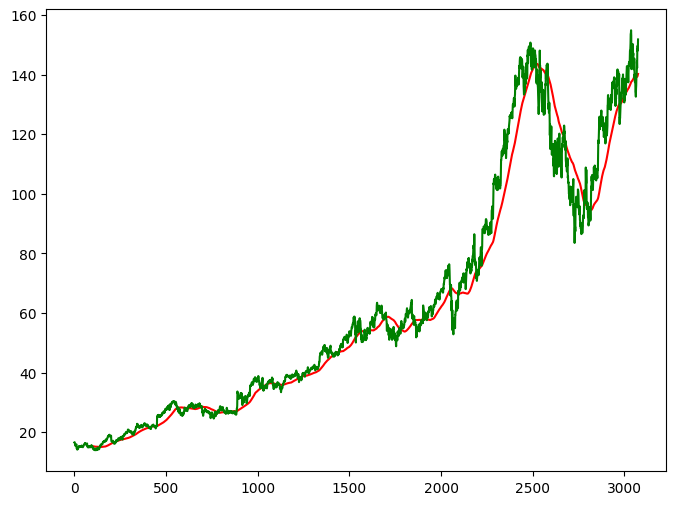

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

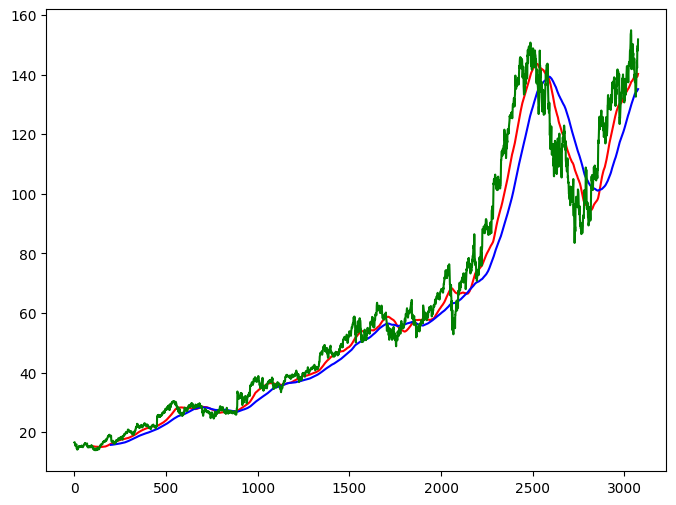

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2460

In [12]:
data_test.shape[0]

615

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
     x.append(data_train_scale[i-100:i])
     y.append(data_train_scale[i,0])         

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import warnings

In [18]:
# Ignore the warning
warnings.simplefilter(action='ignore', category=UserWarning)
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [19]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - loss: 0.0412
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - loss: 0.0033
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 271ms/step - loss: 0.0037
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - loss: 0.0030
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - loss: 0.0033
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0025
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0030
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - loss: 0.0026
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 285ms/step - loss: 0.0028
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - loss: 0.0025
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 261ms/step - loss: 0.0022
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 37s 500ms/step - loss: 0.0022
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 384ms/step - loss: 0.0021
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 394ms/step - loss: 0.0024
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail()

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [25]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
     x.append(data_test_scale[i-100:i])
     y.append(data_test_scale[i,0])   
x,y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step


In [27]:
scale=1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

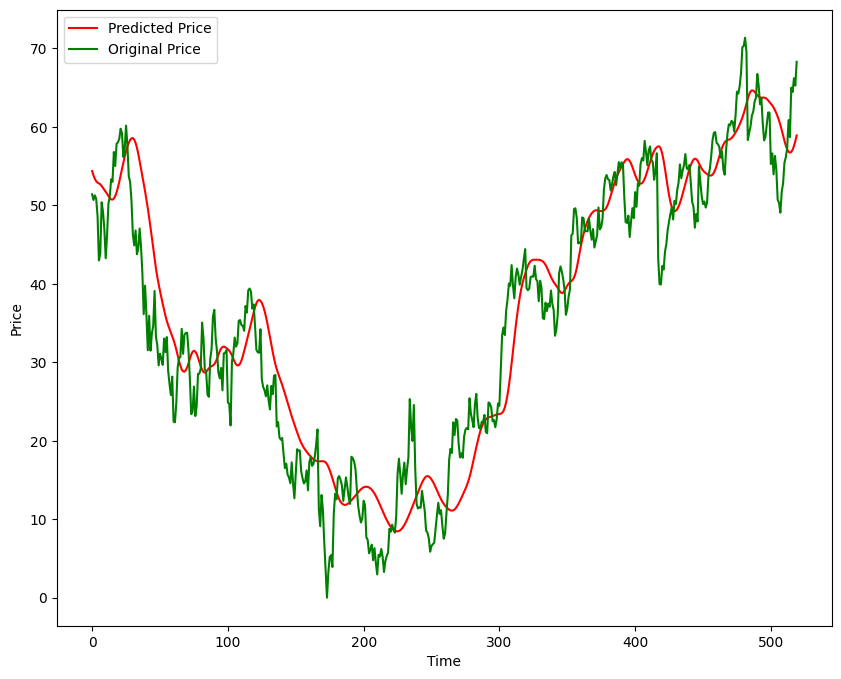

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')